In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

id= ID number<br>
diagnosis= The diagnosis of breast tissues (M = malignant, B = benign)<br>
radius_mean= mean of distances from center to points on the perimeter<br>
texture_mean= standard deviation of gray-scale values<br>
perimeter_mean= mean size of the core tumor<br>
area_mean=<br>
smoothness_mean= mean of local variation in radius lengths<br>
compactness_mean= mean of perimeter^2 / area - 1.0<br>
concavity_mean= mean of severity of concave portions of the contour<br>
concave point_mean= mean for number of concave portions of the contour<br>
symmetry_mean=<br>
fractal_dimension_mean= mean for "coastline approximation" - 1<br>
radius_se= standard error for the mean of distances from center to points on the perimeter<br>
texture_se= standard error for standard deviation of gray-scale values<br>
perimeter_se=<br>
area_se=<br>
smoothness_se= standard error for local variation in radius lengths<br>
compactness_se= standard error for perimeter^2 / area - 1.0<br>
concavity_se= standard error for severity of concave portions of the contour<br>
concave points_se= standard error for number of concave portions of the contour<br>
symmetry_se=<br>
fractal_dimension_se= standard error for "coastline approximation" - 1<br>
radius_worst= "worst" or largest mean value for mean of distances from center to points on the perimeter<br>
texture_worst= "worst" or largest mean value for standard deviation of gray-scale values<br>
perimeter_worst=<br>
area_worst=<br>
smoothness_worst= "worst" or largest mean value for local variation in radius lengths<br>
compactness_worst= "worst" or largest mean value for perimeter^2 / area - 1.0<br>
concavity_worst= "worst" or largest mean value for severity of concave portions of the contour<br>
concave points_worst= "worst" or largest mean value for number of concave portions of the contour<br>
symmetry_worst=<br>
fractal_dimension_worst= "worst" or largest mean value for "coastline approximation" - 1<br>

In [3]:
df=pd.read_csv("Breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<b> EXPLORATORY DATA ANALYSIS <b>

In [7]:
#statistical summary of feature 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
df=df.drop(["id","Unnamed: 32"],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

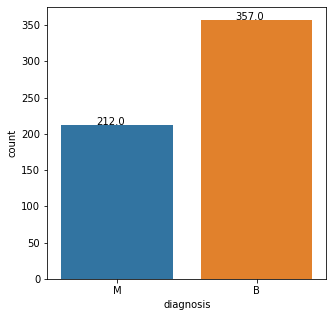

In [17]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df["diagnosis"])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()))
                                                 
plt.savefig('count_plot.jpg')
plt.show                

In [18]:
#selectring only numerical features 
num_feat=df.select_dtypes(include=["float64",'int64']).columns
num_feat

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

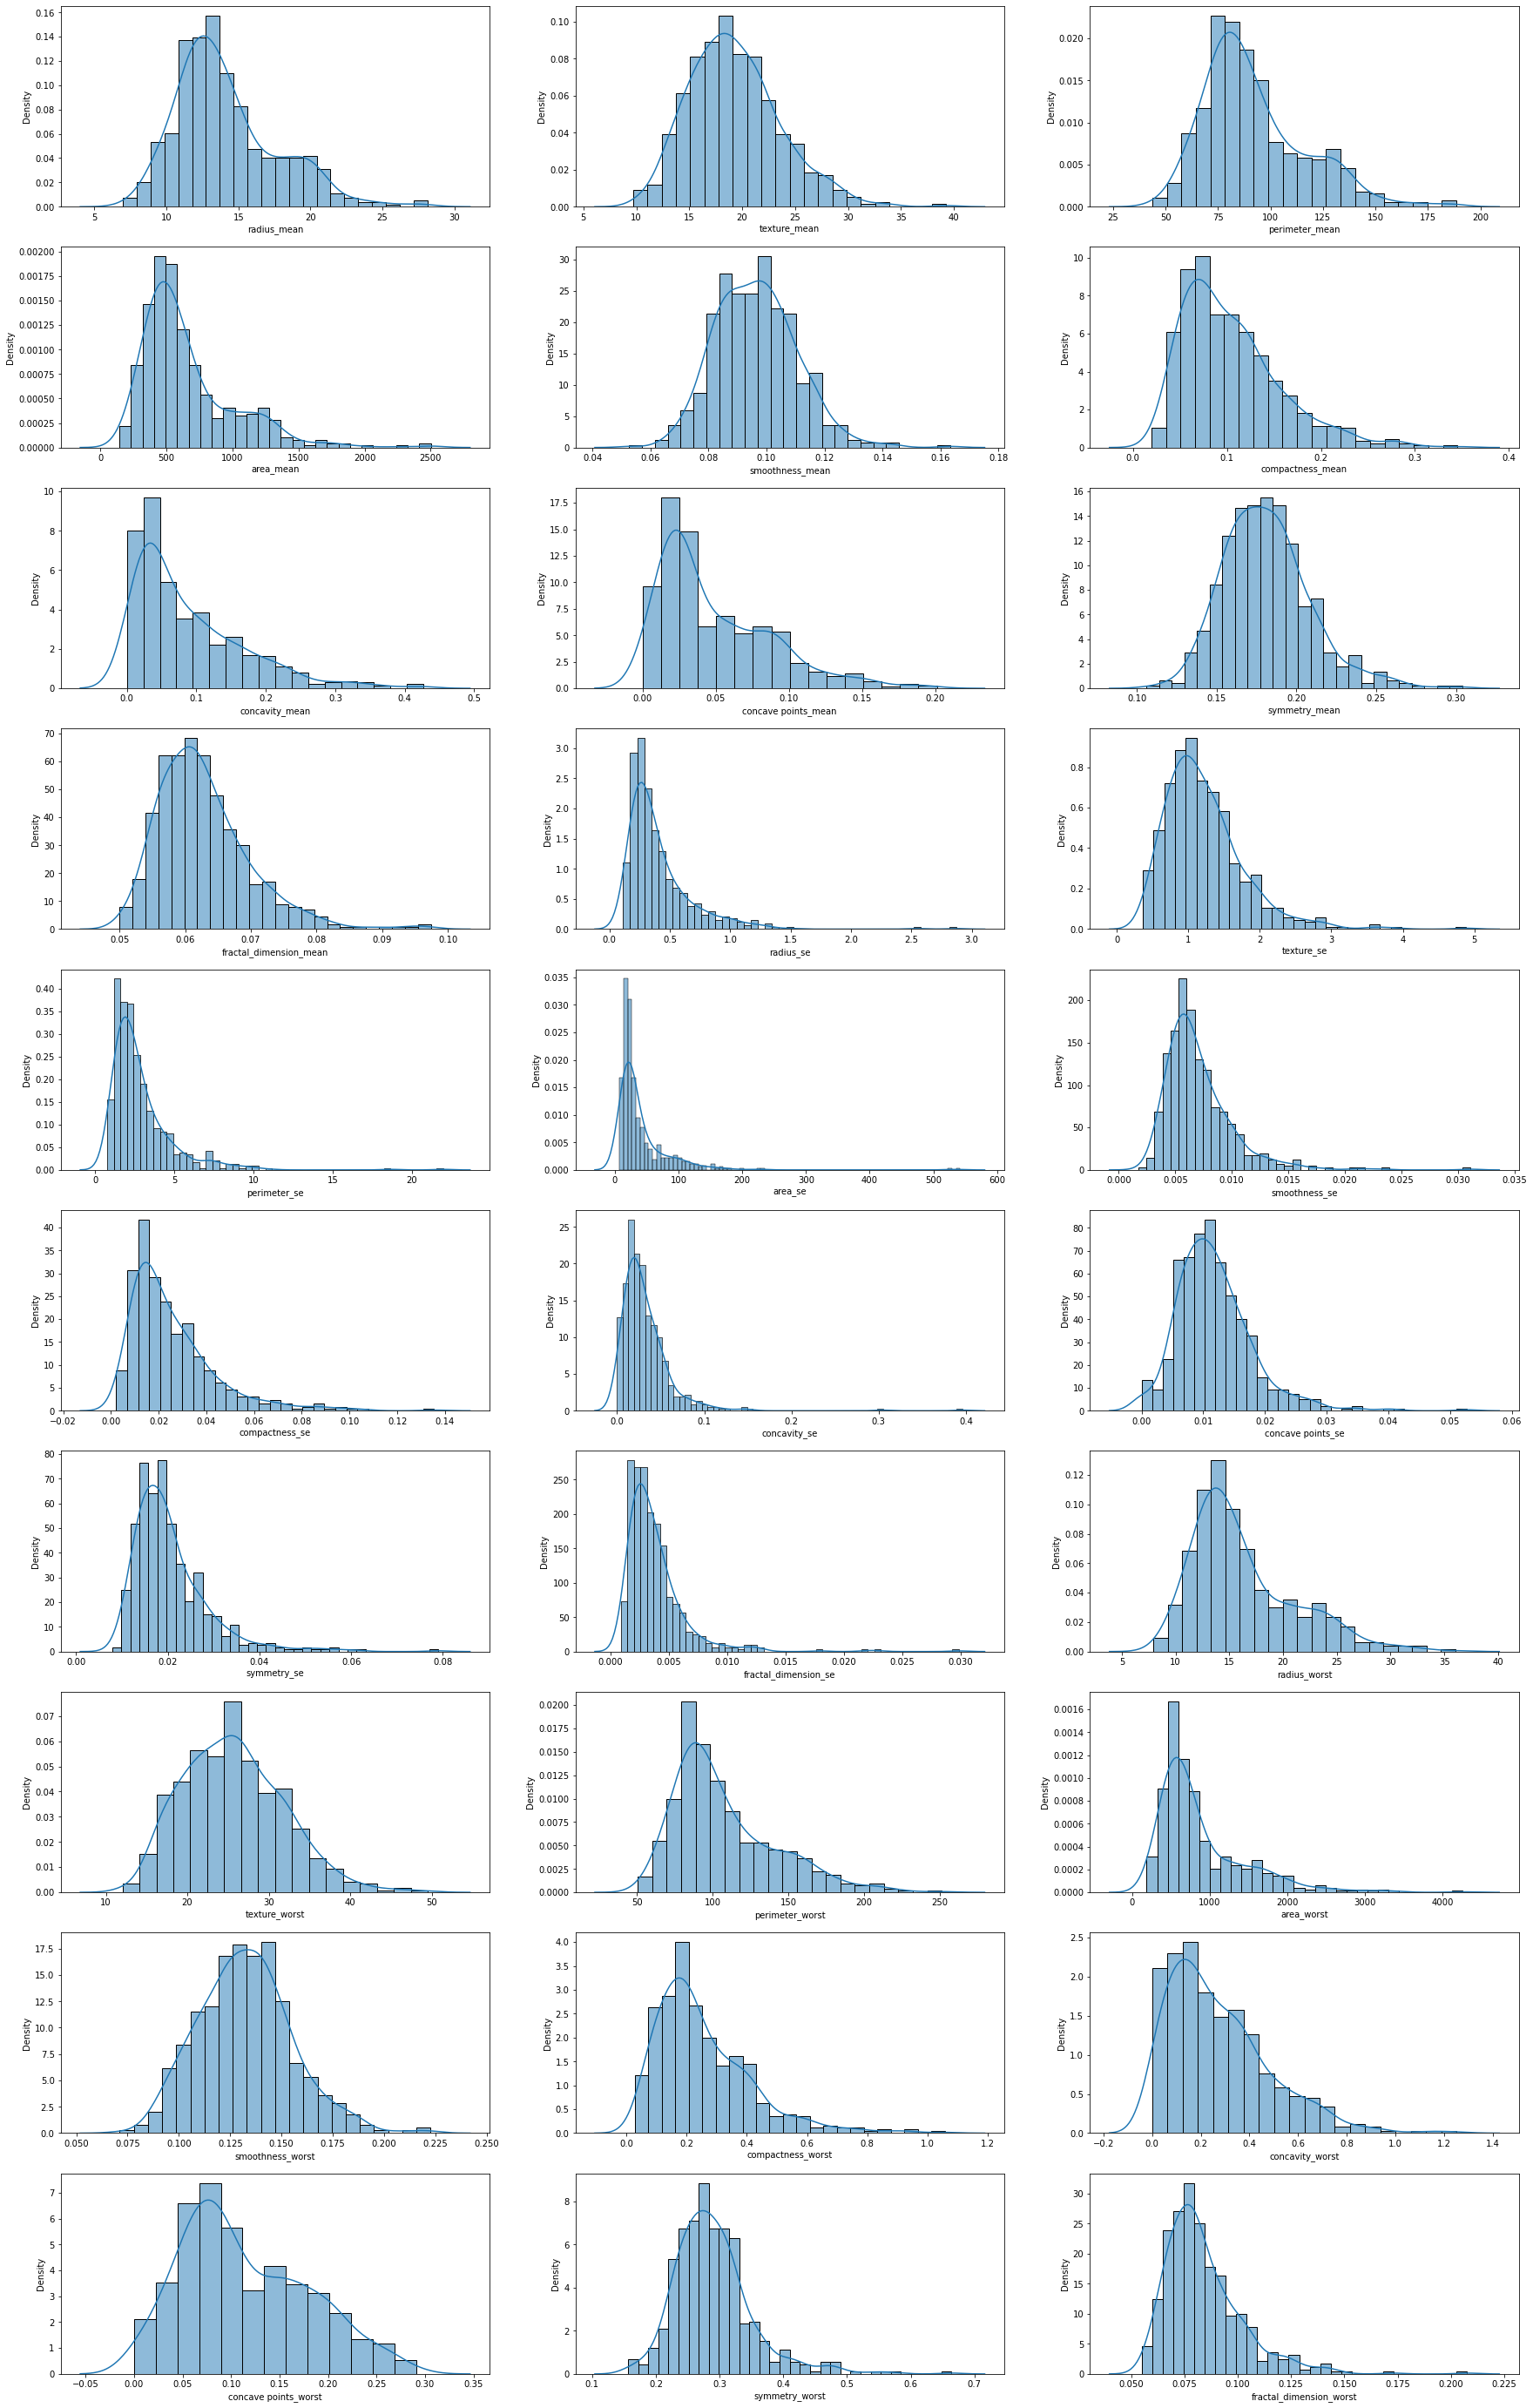

In [20]:
#plotting distriubution of numerical features 

plt.figure(figsize=(30,50))
for i, col in enumerate(num_feat,1):
    plt.subplot(10,3,i)
    sns.histplot(df[col],kde=True, stat="density",kde_kws=dict(cut=3))

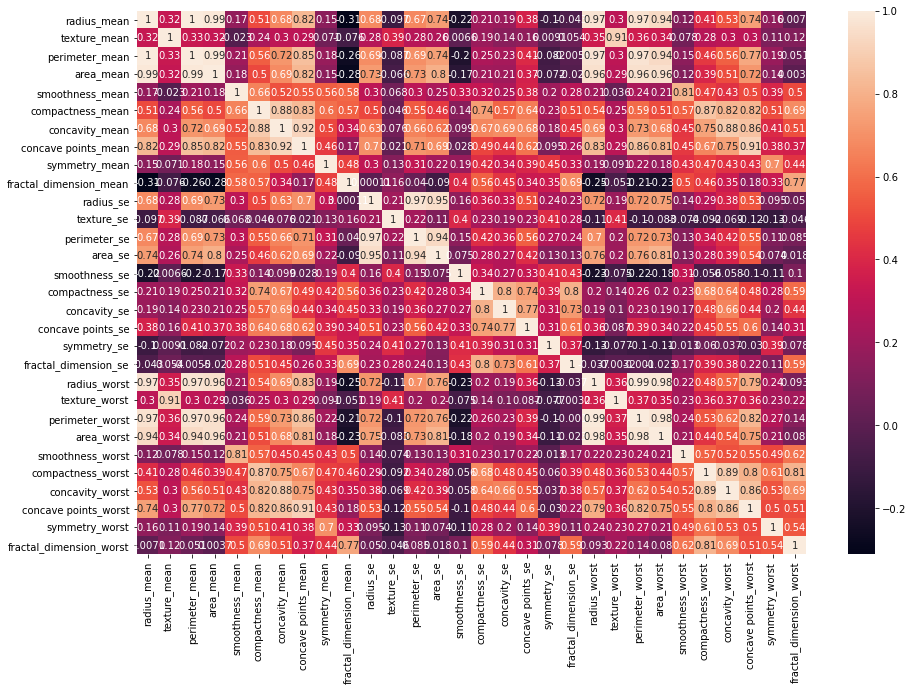

In [25]:
#correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
#finding correalted feature 

def correlation(dataset,threshold):
    col_corr=set() #set of all correlated columns 
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr            

In [28]:
correlated_col=correlation(df,0.8) #we are setting threshold as 0.8

print("Features showing multicollinearity :")
correlated_col

Features showing multicollinearity :


{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

<b> DATA PREPROCESSING<b>

In [29]:
data=df.copy()

<b>Handling null values<b>

In [30]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<b>Handling duplicated observations<b>

In [32]:
#checking for duplicated observations
data.duplicated().sum()

0

<b> Dealing multicollinearity<b>

In [33]:
#removing columns with multicollinearity

data=data.drop(correlated_col,axis=1)
data.shape

(569, 14)

<b>Encoding categorical variable<b>

In [34]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

<b>One hot encoding<b>
    

In [35]:
data["diagnosis"]=pd.get_dummies(data.diagnosis, drop_first=True)
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


In [36]:
data["diagnosis"].unique()

array([1, 0], dtype=uint8)

<b>Seprating features and matrix<b>

In [37]:
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [49]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7722765469834092 on Random State 9


<b>Splitting data into test and train set <b>

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=9)

In [51]:
print("Shape of Train set: ", X_train.shape)
print("Shape of Test set :", X_test.shape)

Shape of Train set:  (455, 13)
Shape of Test set : (114, 13)


In [52]:
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
361,13.30,21.57,0.08582,0.06373,0.1815,0.05696,0.2621,1.5390,0.005498,0.02045,0.006399,0.01829,0.2637
511,14.81,14.70,0.08472,0.05016,0.1659,0.05348,0.2182,0.6232,0.006708,0.01197,0.010560,0.01580,0.2334
438,13.85,19.60,0.08684,0.06330,0.1555,0.05673,0.3419,1.6780,0.005836,0.01095,0.007039,0.02014,0.2513
150,13.00,20.78,0.11350,0.07589,0.2540,0.06087,0.4202,1.3220,0.007017,0.01142,0.011530,0.02951,0.3196
236,23.21,26.97,0.09509,0.16820,0.1909,0.06309,1.0580,0.9635,0.006428,0.02863,0.017160,0.01590,0.3103


<b>Feature Scaling<b>

In [53]:
#Standardizing the dataset 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [54]:
X_train

array([[-0.25466975,  0.55926985, -0.75596998, ..., -0.8814599 ,
        -0.26489471, -0.44081068],
       [ 0.1722519 , -1.08375387, -0.83512309, ..., -0.19814396,
        -0.56424114, -0.92620131],
       [-0.09916848,  0.08812622, -0.68257345, ..., -0.77635963,
        -0.04248872, -0.63945239],
       ...,
       [-0.10765037,  1.25761472,  1.43009516, ...,  0.72148336,
         0.46243297,  1.18356591],
       [-0.77206487, -0.76567213, -0.40050053, ..., -0.89525431,
        -0.3538571 , -0.09799353],
       [-0.60808172,  0.83430293, -1.94110799, ...,  0.80523514,
         0.50571197, -1.15528006]])

<b>Machine Learning Model for Classification and Evaluation Metrics</b>

In [59]:
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
    
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
   
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    

    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    

    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [61]:
model=LogisticRegression()
classify(model, X, y)

Accuracy Score: 90.35087719298247

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        74
           1       0.91      0.80      0.85        40

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114

Cross Validation Score: 90.15680794907622

Accuracy Score - Cross Validation Score is 0.1940692439062417


In [63]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, y)

Accuracy Score: 88.59649122807018

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        74
           1       0.89      0.78      0.83        40

    accuracy                           0.89       114
   macro avg       0.89      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114

Cross Validation Score: 89.80748331004503

Accuracy Score - Cross Validation Score is -1.210992081974851


In [65]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, y)

Accuracy Score: 94.73684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       0.95      0.90      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Cross Validation Score: 94.37820214252446

Accuracy Score - Cross Validation Score is 0.3586399627386925


In [66]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, y)

Accuracy Score: 87.71929824561403

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        74
           1       0.88      0.75      0.81        40

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114

Cross Validation Score: 88.40242198416395

Accuracy Score - Cross Validation Score is -0.6831237385499236


In [67]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [68]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [69]:
GSCV.fit(X_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [70]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [73]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 95.6140350877193


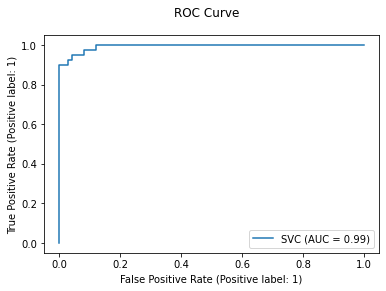

In [75]:
disp = metrics.plot_roc_curve(Final_Model, X_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

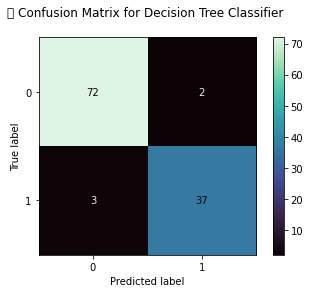

In [76]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()